# Additional study: how does noise affect the different keypoint descriptors methods?

After executing the main code for different methods with noisy images and "clean" images, we save the data in a csv containing the columns: Descriptor (descriptor method), MatchingMethod, map1 (MAP@1 score), map5 (MAP@5 score)

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read csv files 
noise_df = pd.read_csv("/Users/abriil/Uni/master/C1/data/results/results_NOISE.csv")
no_noise_df = pd.read_csv("/Users/abriil/Uni/master/C1/data/results/results_NO_NOISE.csv")

In [ ]:
# Drop extra columns in my dataframe
noise_df.drop(columns=['Submission', 'F1_Score_Unknown'], inplace=True)
no_noise_df.drop(columns=['Submission', 'F1_Score_Unknown'], inplace=True)

In [66]:
no_noise_df

,Descriptor,MatchingMethod,map1,map5
0,ORB,BruteForce,0.500000,0.500000
1,ORB,FLANN,0.900000,0.900000
2,AKAZE,BruteForce,0.066667,0.066667
3,AKAZE,FLANN,0.966667,0.966667


In [69]:
# Aggregate by Descriptor and MatchingMethod
avg_no_noise = no_noise_df.groupby(['Descriptor', 'MatchingMethod']).mean()
avg_with_noise = noise_df.groupby(['Descriptor', 'MatchingMethod']).mean()

/opt/anaconda3/envs/prova/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/prova/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/prova/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/envs/prova/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)


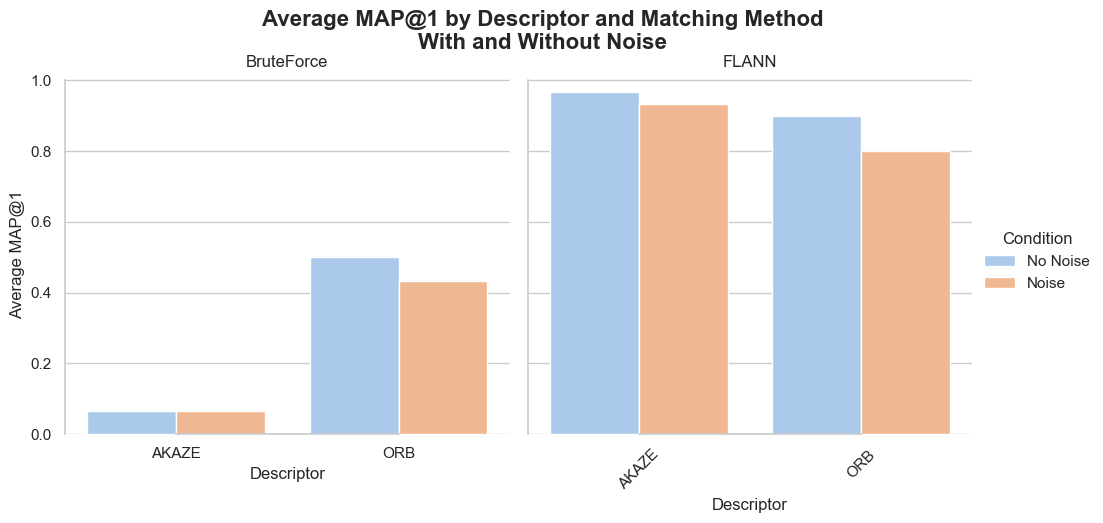

In [74]:
avg_map1 = pd.concat([avg_no_noise['map1'], avg_with_noise['map1']], axis=1)
avg_map1.columns = ['No Noise', 'Noise']
avg_map1 = avg_map1.reset_index()

# Melt the data to have a long format suitable for seaborn
avg_map1_melted = avg_map1.melt(id_vars=["Descriptor", "MatchingMethod"], 
                                var_name="Condition", 
                                value_name="MAP@1")

# Set the style and color palette for seaborn
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# Create a FacetGrid to show each MatchingMethod in a separate subplot
g = sns.FacetGrid(avg_map1_melted, col="MatchingMethod", height=5, aspect=1)
g.map_dataframe(
    sns.barplot, x="Descriptor", y="MAP@1", hue="Condition", palette=palette, ci=None
)

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Descriptor", "Average MAP@1")
g.add_legend(title="Condition")

# Improve layout and appearance
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Average MAP@1 by Descriptor and Matching Method\nWith and Without Noise", fontsize=16, weight='bold')
plt.xticks(rotation=45)
sns.despine(trim=True)
plt.show()



/var/folders/5y/ljztfs697fqf9rvmq2qtpg3m0000gn/T/ipykernel_1567/3712828204.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(
/var/folders/5y/ljztfs697fqf9rvmq2qtpg3m0000gn/T/ipykernel_1567/3712828204.py:24: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g = sns.catplot(


<Figure size 1200x600 with 0 Axes>

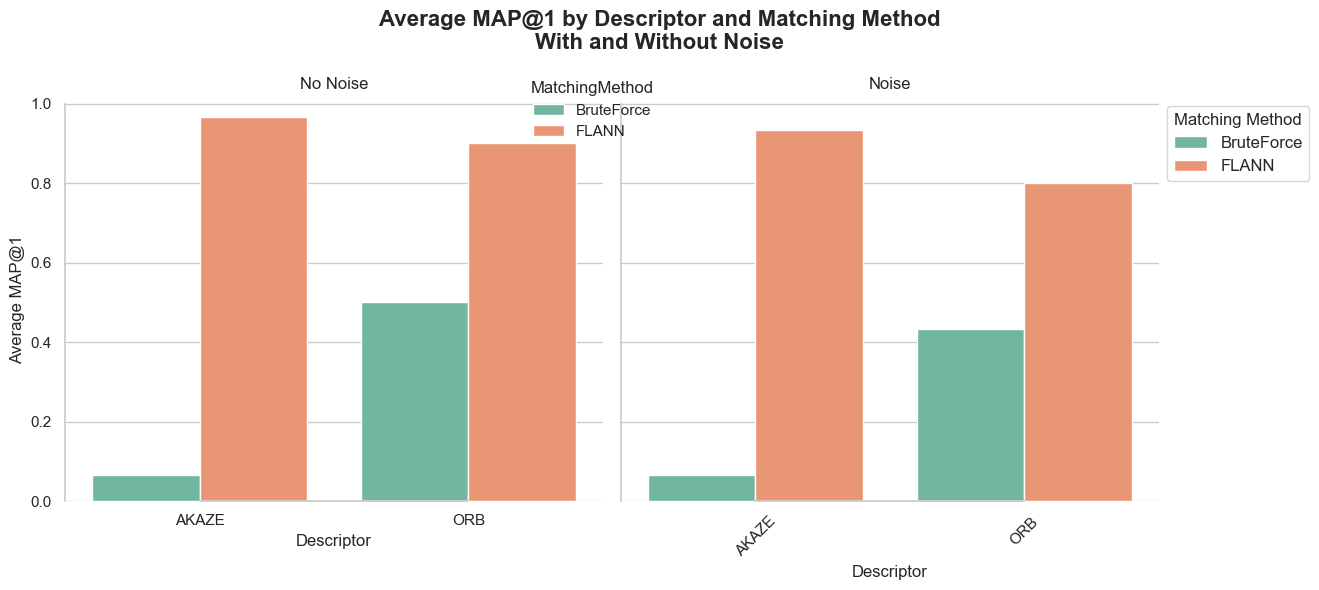

In [73]:
avg_map1 = pd.concat([avg_no_noise['map1'], avg_with_noise['map1']], axis=1)
avg_map1.columns = ['No Noise', 'Noise']
avg_map1 = avg_map1.reset_index()

# Melt the data for a long format suitable for seaborn
avg_map1_melted = avg_map1.melt(id_vars=["Descriptor", "MatchingMethod"], 
                                var_name="Condition", 
                                value_name="MAP@1")

# Set the style and color palette for seaborn
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")  # Distinct colors for each MatchingMethod

# Create a bar plot
plt.figure(figsize=(12, 6))
'''sns.barplot(
    data=avg_map1_melted,
    x="Descriptor", y="MAP@1", hue="MatchingMethod", 
    dodge=True, ci=None, palette=palette,
    hue_order=avg_map1_melted["MatchingMethod"].unique()
)'''

# Split bars within each Descriptor by Condition (No Noise and Noise)
g = sns.catplot(
    data=avg_map1_melted,
    x="Descriptor", y="MAP@1", hue="MatchingMethod", col="Condition",
    kind="bar", palette=palette, ci=None, height=6, aspect=1,
    dodge=True
)

# Customize the plot for a professional look
g.set_titles("{col_name}")
g.set_axis_labels("Descriptor", "Average MAP@1")
#g.add_legend(title="Matching Method")
# Adjust legend position manually
plt.legend(title="Matching Method", bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
g._legend.set_bbox_to_anchor((0.5, 0.8))  # Adjust position to between 0.8 and 1.0


# Add an overall title
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Average MAP@1 by Descriptor and Matching Method\nWith and Without Noise", fontsize=16, weight='bold')
plt.xticks(rotation=45)
sns.despine(trim=True)
plt.tight_layout()
plt.show()


/var/folders/5y/ljztfs697fqf9rvmq2qtpg3m0000gn/T/ipykernel_1567/1868513730.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/5y/ljztfs697fqf9rvmq2qtpg3m0000gn/T/ipykernel_1567/1868513730.py:23: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(


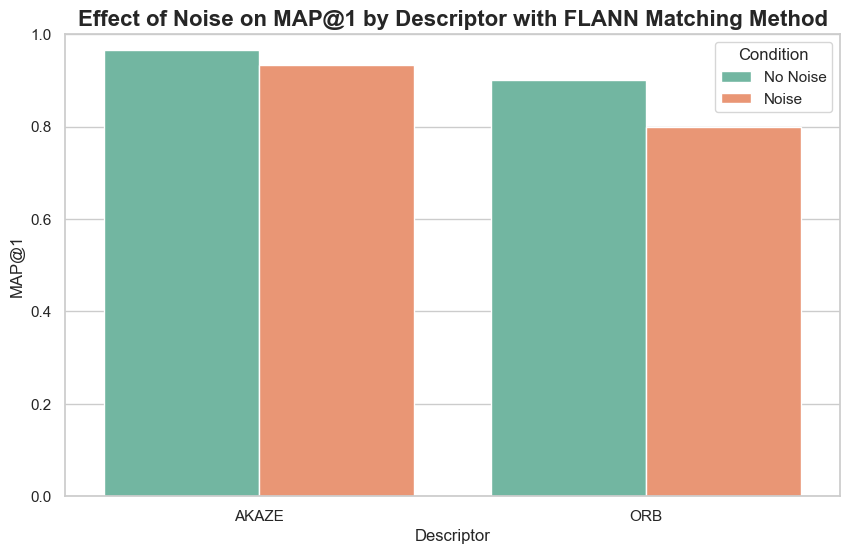

In [72]:
avg_map1 = pd.concat([avg_no_noise['map1'], avg_with_noise['map1']], axis=1)
avg_map1.columns = ['No Noise', 'Noise']
avg_map1 = avg_map1.reset_index()

# Filter to only include rows where MatchingMethod is "FLANN"
avg_map1 = avg_map1[avg_map1["MatchingMethod"] == "FLANN"]

# Create the dataset
data = avg_map1
df = pd.DataFrame(data)

# Melt the DataFrame to long format for Seaborn
df_melted = df.melt(id_vars=["Descriptor", "MatchingMethod"], 
                    var_name="Condition", 
                    value_name="MAP@1")

# Set the style for Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")  # Distinct colors for each condition

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melted,
    x="Descriptor", y="MAP@1", hue="Condition", 
    palette=palette, ci=None
)

# Add title and labels for better understanding
plt.title("Effect of Noise on MAP@1 by Descriptor with FLANN Matching Method", fontsize=16, weight='bold')
plt.xlabel("Descriptor")
plt.ylabel("MAP@1")
plt.legend(title="Condition")
plt.ylim(0, 1)  # Adjust to focus on differences in MAP@1

# Display plot
plt.show()


/var/folders/5y/ljztfs697fqf9rvmq2qtpg3m0000gn/T/ipykernel_1567/3625930814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


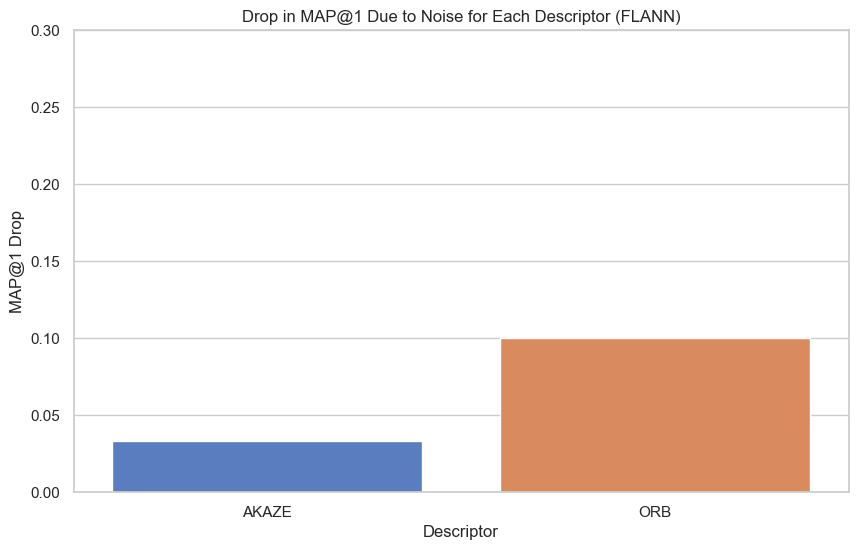

In [76]:
df_diff = df.copy()
df_diff["MAP@1 Difference"] = df_diff["No Noise"] - df_diff["Noise"]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_diff, 
    x="Descriptor", y="MAP@1 Difference", palette="muted"
)

plt.title("Drop in MAP@1 Due to Noise for Each Descriptor (FLANN)")
plt.xlabel("Descriptor")
plt.ylabel("MAP@1 Drop")
plt.ylim(0, 0.3)  # Adjust based on the max drop in your dataset
plt.show()


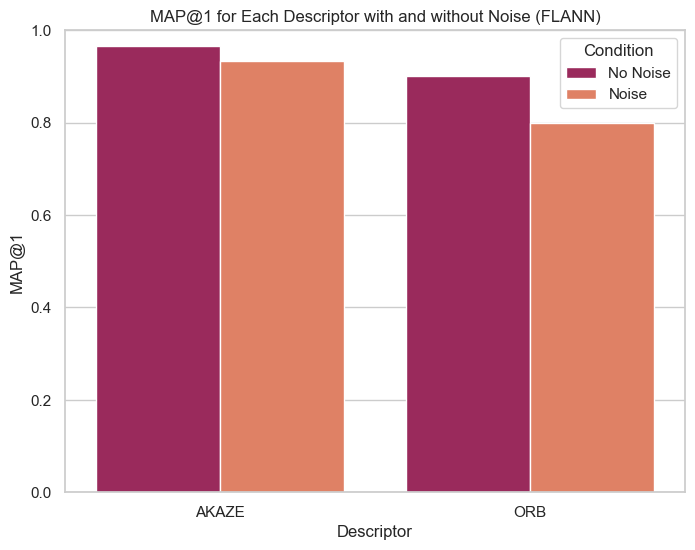

In [88]:
# Sample data
data = avg_map1.loc[avg_map1['MatchingMethod'] == 'FLANN'].drop(columns=['MatchingMethod'])
df = pd.DataFrame(data)

# Melt the data into long format
df_melted = df.melt(id_vars="Descriptor", var_name="Condition", value_name="MAP@1")

# Set style and color palette
sns.set(style="whitegrid")
palette =[sns.color_palette("rocket")[2], sns.color_palette("rocket")[-2]]

# Plot with bars for No Noise and Noise side-by-side for each Descriptor
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_melted, x="Descriptor", y="MAP@1", hue="Condition", 
    palette=palette
)

# Customize plot
plt.title("MAP@1 for Each Descriptor with and without Noise (FLANN)")
plt.xlabel("Descriptor")
plt.ylabel("MAP@1")
plt.ylim(0, 1)
plt.legend(title="Condition")

# Save the plot as a PNG image
output_path = "barplot_noise.png"
plt.savefig(output_path, format="png")

# Show plot
plt.show()



